# 1장 머신러닝과 선형회귀

In [ ]:
# 기본적인 라이브러리.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

## 왜 선형회귀를 배울까??

다양한 머신 러닝의 분류 중에서 왜 하필 선형회귀를 가장 먼저 배워야하는가?에 대한 답은 다음과 같이 정리할 수 있겠다.  
예를 들어 입출력 관계를 찾지 않는 K-최근접 이웃 알고리즘이 있다.  
임의의 입력이 들어오면 가지고 있던 데이터 중에서 가장 비슷한 것을 k개 골라 평균한 값을 출력으로 돌려주는 방법이다. 
선형회귀인 경우 입력-출력이 가지는 직선 관계를 가장!!!!!잘 표현하고 있다.   
k-최근접 이웃과 선형회귀의 두 알고리즘의 가장 큰 차이점은 모델을 설정하느냐, 하지 않느냐이다. 
k-최근접 이웃은 모델 없이 그냥 데이터 기반으로 결과를 만들어내지만, 선형회귀에서는 w1와 w0처럼 분명하게 알고리즘을 결정하는 요소들이 존재한다.  
딥러닝은 "모델"을 설정하고 "관계"를 찾는 알고리즘을 발견하는 것..,,, 따라서 선형회귀는 그런 알고리즘의 출발점이기 때문에 중요하다고 할 수 있음!

# 선형회귀란?

선형 회귀란 독립 변수 x를 사용해 종속 변수 y의 움직임을 예측하고 설명하는 것..  
독립 변수가 x 하나뿐이어서 이것만으로는 정확히 설명할 수 없을 때는 x1, x2, x3 등 x값을 여러개 필요로 한다.
참고로 하나의 x 값만으로도 y 값을 설명할 수 있을 때 이를 단순 선형 회귀, x 값이 여러 개 필요할 때는 다중 선형 회귀라고 함,
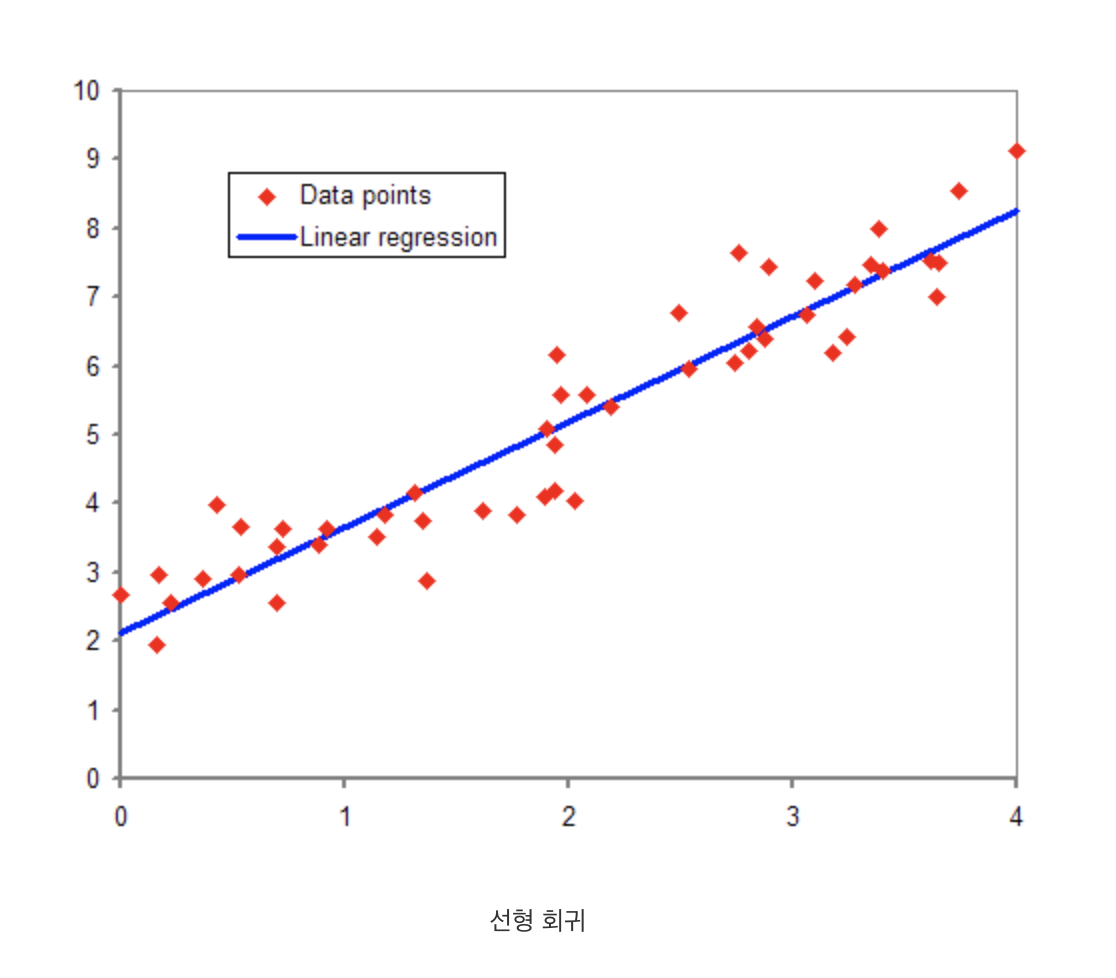

사진 출처 : https://ebbnflow.tistory.com/129

# 최소제곱법이란?

최소 제곱법이란 회귀 분석에서 사용되는 표준 방식이며 실험이나 관찰을 통해 얻은 데이터를 분석하여 미지의 상수를 구할 때 사용되는 공식이라고ㅓ한다.  
최소 제곱법을 통해 일차 함수의 기울기 a와 y 절편 b를 바로 구할 수 있음.  
예를 들어서 x 값(입력 값, 여기서는 ‘공부한 시간’)과 y 값(출력 값, 여기서는 ‘성적’)일 때 이를 이용해 기울기 a를 구하는 방법은 다음과 같다. 
 
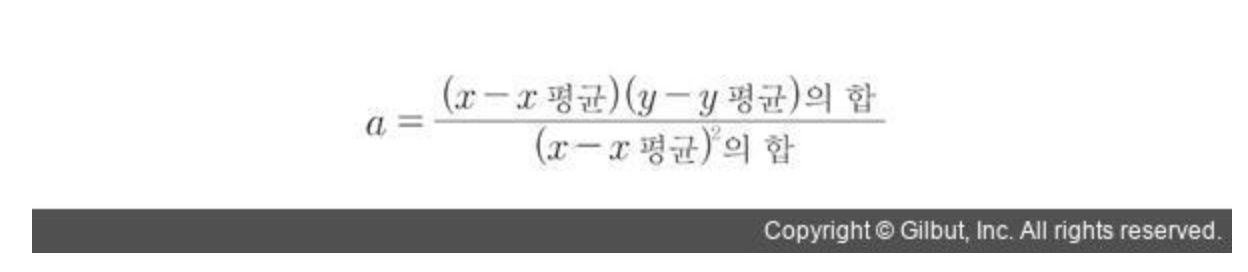
사진 출처 : https://ebbnflow.tistory.com/129

# 경사하강법이란?

해당 함수의 최소값 위치를 찾기 위해 비용(손실)함수의 기울기 반대 방향으로 정의한 step size를 가지고, 조금씩 움직여 가면서 최적의 파라미터를 찾으려는 방법이다.  
여기서 기울기(gradient) 파라미터에 대해 편미분한 벡터를 의미하며 이 파라미터를 반복적으로 조금씩 움직이는 것이 바로 최적화의 과정이라고 할 수 있다!! 완전 중요한 개념.

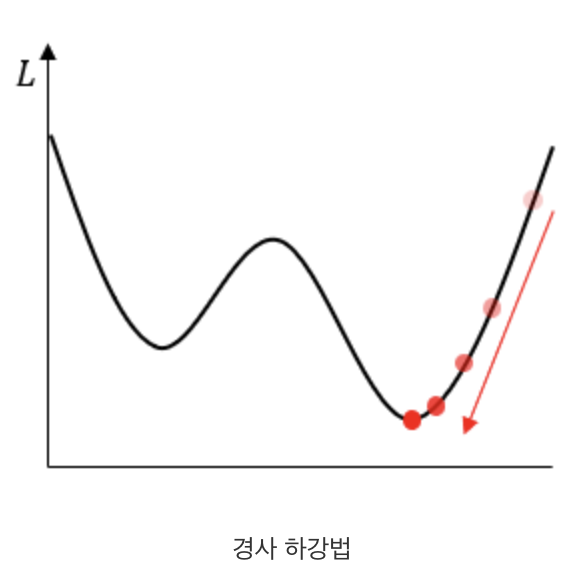

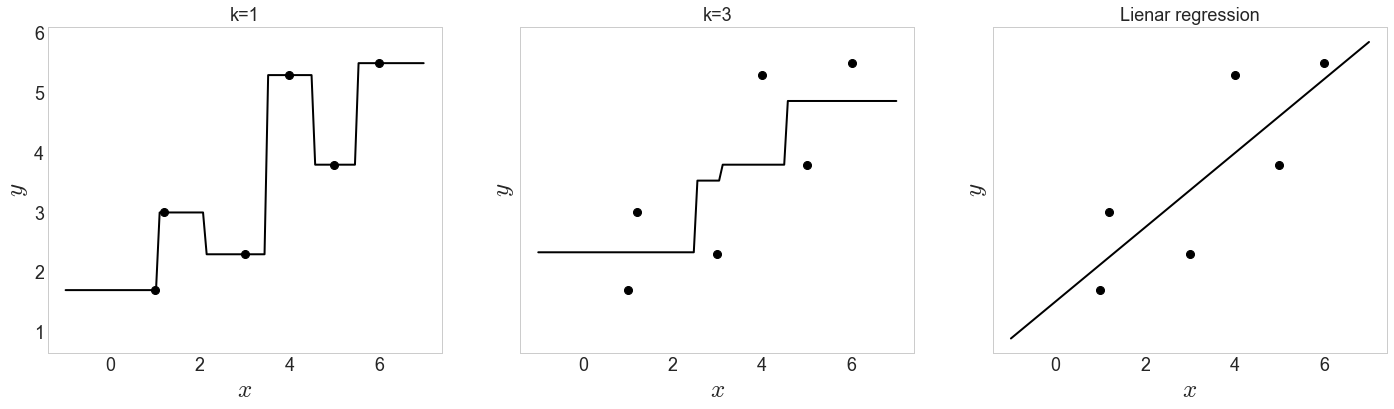

In [16]:
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])

def machine_learning(D):
    """
    선형회귀 알고리즘을 사용하여 최적의 직선을 계산하는 함수이다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장핟나.
    """
    # 데이터의 개수를 N에 할당하기
    N = D.shape[1] 
    
    # 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬 생성
    # 예시 ; X: (N,2), y: (N,)
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    
    # 1차함수? 정규방정식을 풀어서 직선의 계수를 구해보자
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def f(x, w):
    """
    주어진 w를 사용하여 직선 f(x) = w[1]*x + w[0]의 값을 계산하낟
    """
    return w[1]*x + w[0]

##################################이상 선형회귀선 만드는 코드,#############################

def dist(x1, x2):
    return np.abs(x1-x2)

def knn_point(D, p, k=3):
    return sorted(D, key=lambda e: dist(e[0], p) )[:k]

fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(24,6)

x = np.linspace(-1, 7, 100)

# knn
for i, k in enumerate([1, 3]):
    y_pred = []
    for p in x :
        ps = knn_point(D1.T, p, k)
        y_pred.append(np.asarray(ps)[:,1].mean())

    ax[i].plot(D1[0], D1[1], 'ko', markersize=8)    
    ax[i].plot(x, y_pred, c='k')
    ax[i].set_title("k={}".format(k), fontsize=18)
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)
    ax[i].set_xlabel('$x$', fontsize=25)
    ax[i].set_ylabel('$y$', fontsize=25)
    ax[i].grid(False)
    
# linear regression
w_ml_d1 = machine_learning(D1)
ax[2].plot(D1[0], D1[1], 'ko', markersize=8) 
ax[2].plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax[2].set_title('Lienar regression', fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=18)
ax[2].yaxis.set_tick_params(labelsize=18)
ax[2].set_xlabel('$x$', fontsize=25)
ax[2].set_ylabel('$y$', fontsize=25)
ax[2].grid(False)

plt.show()

위의 그래프를 보다시피 선형회귀는 입력-출력을 설명할 수 있는 가장 간단하면서,,,기초적인? 알고리즘이라고 할 수 있다. 

# 그러나!!!!!
# 실생활에서 관찰할 수 있는 모든 현상의 원인과 결과는 직선 형태로 표현할 수 없는 한계가 있다. 그로 인해 정확도가 떨어지고 이부분을 보완하기 위해 나온 개념이 바로 '로지스틱 회귀'이다!. 로지스틱 회귀는 선형회귀에서 구하는 직선 대신 S자 곡선을 이용하여 분류의 정확도를 향상한 방법이다. 때문에 선형회귀를 먼저 이해하면 로지스틱 회귀를 더 쉽게 이해할 수 있다.  

# 더 나아가서는 아래 사진처럼 로지스틱 회귀를 여러 단계로 묶으면 다층퍼셉트론을 구성할 수 있다. = 딥러닝의 출발점임..

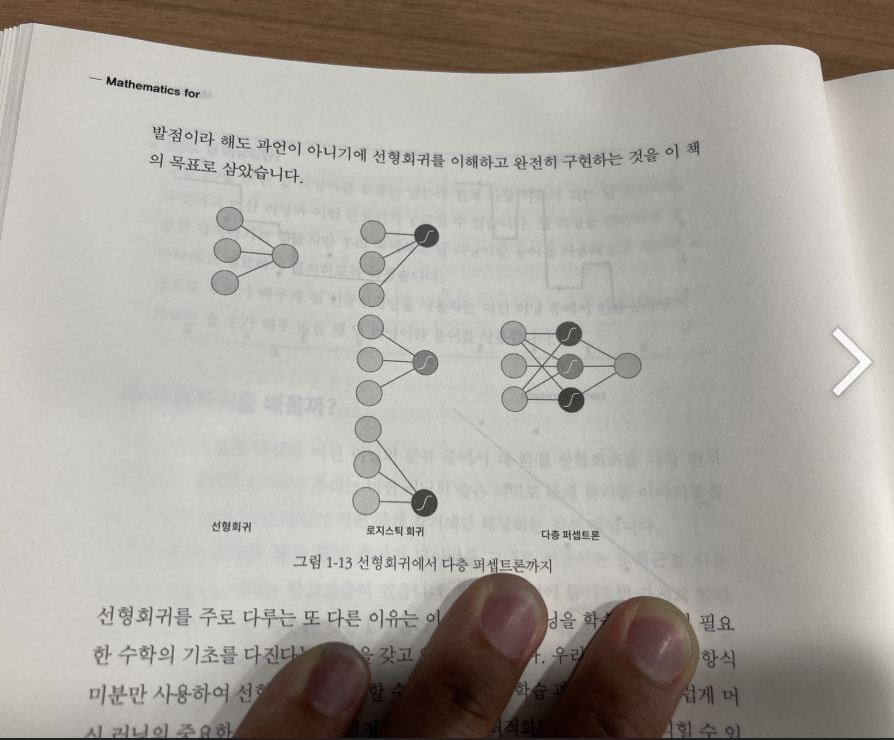
사진 출처 : 조준우, ⎡머신러닝,딥 러닝에 필요한 기초 수학 with 파이썬⎦ , 인사이트(2020)